In [874]:
import numpy as np
import pandas as pd
from metadata import data_type
from src.pipe_store import (
    data_loader,
    date_parser,
    clean_string_strip,
    set_data_types,
    integer_encoder,
    sort_values_per_client,
    datetime2int
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [875]:
data_path = '/Users/Danial/Downloads/assesment_file2_churn.csv'
df = (
    data_loader(data_path, parse_dates=['MONTH_PERIOD'], date_parser=date_parser)
    .pipe(set_data_types, data_type)
    .pipe(clean_string_strip, 'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY')
    .pipe(sort_values_per_client, 'MONTH_PERIOD')
)


# df.MONTH_PERIOD = df.MONTH_PERIOD.apply(lambda x: (x - pd.to_datetime('2011-1-1').to_period('M')).n)

Step: data_loader | Shape: (100056, 28) | Computation Time: 0.739575s
Step: data_loader | Shape: (100056, 28) | Computation Time: 0.739575s
Step: data_loader | Shape: (100056, 28) | Computation Time: 0.739575s
Step: data_loader | Shape: (100056, 28) | Computation Time: 0.739575s
Step: data_loader | Shape: (100056, 28) | Computation Time: 0.739575s
Step: set_data_types | Shape: (100056, 28) | Computation Time: 0.142854s
Step: set_data_types | Shape: (100056, 28) | Computation Time: 0.142854s
Step: set_data_types | Shape: (100056, 28) | Computation Time: 0.142854s
Step: set_data_types | Shape: (100056, 28) | Computation Time: 0.142854s
Step: set_data_types | Shape: (100056, 28) | Computation Time: 0.142854s
Step: clean_string_strip | Shape: (100056, 28) | Computation Time: 0.006729s
Step: clean_string_strip | Shape: (100056, 28) | Computation Time: 0.006729s
Step: clean_string_strip | Shape: (100056, 28) | Computation Time: 0.006729s
Step: clean_string_strip | Shape: (100056, 28) | Compu

# Missing Values
Variables with missing values are: ACCOUNTMODEL, AGE_CLASS, HOMEBANK_COLOUR, LOYALITY

Missing totally at random -> random sampling from variable distribution

Missing at random -> random sampling from variable distribution or predict missing class via Logistic Regression

Missing not at random: will not be imputed

In [16]:
col_with_missing = ['ACCOUNTMODEL', 'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY']
for col in col_with_missing:
    print(f'Column:{col}, missingness: {df[col].isna().sum() * 100 / len(df): 0.3} %')

Column:ACCOUNTMODEL, missingness:  7.01 %
Column:AGE_CLASS, missingness:  5.29 %
Column:HOMEBANK_COLOUR, missingness:  15.1 %
Column:LOYALITY, missingness:  23.0 %


In [17]:
# def impute_age_class(df):
#     df_imp = df.copy(deep=True)
#     df_imp.AGE_CLASS = df_imp.AGE_CLASS.replace('Leeftijd_onbekend', np.NAN)
#     ids_age_nan = df_imp[df_imp.AGE_CLASS.isna()].CUSTOMER_ID.unique()
#     for id in ids_age_nan:
#         ind = df_imp.CUSTOMER_ID.eq(id)
#         filled = df_imp[ind].AGE_CLASS.fillna(method='backfill')
#         if not filled.isna().sum():
#             filled = df_imp[ind].AGE_CLASS.fillna(method='ffill')
#         df_imp.loc[ind ,'AGE_CLASS'] = filled
#     return df_imp


In [18]:
df_imp = impute_age_class(df)

In [19]:
df_imp[df_imp.AGE_CLASS.isna()].CUSTOMER_ID.unique()

[3191552658, 7691376038, 3154206906, 1616013923, 3610256702, ..., 81085578, 2048794536, 8855475213, 107886320, 8524962628]
Length: 642
Categories (4169, int64): [1276999, 2230541, 4560107, 9033484, ..., 9994208068, 9996817487, 9998114037, 10000527542]

In [ ]:
# (df.AGE_CLASS.value_counts(normalize=True) * 100).plot.bar()

In [ ]:
# (df.ACCOUNTMODEL.value_counts(normalize=True) * 100).plot.bar();

# EDA 

In [51]:
from src.feature_selection import variable_variances, variable_variances_per_client
variable_variances(df, include_label=False)
# 'Record_Count', 'TARGET' should be discarded from the data set

Highest variances
 {'MONTH_PERIOD': 47.92, 'INVESTED_CAPITAL_CLASS': 13.4, 'SAVINGS_CAPITAL_CLASS': 13.13, 'BUSINESS_VOLUME_CLASS': 6.57, 'CREDIT_CLASS': 5.2}
Lowest variances
 {'Record_Count': 0.0, 'TARGET': 0.0, 'MORTGAGE_IND': 0.06, 'INSURANCE_LIFE_IND': 0.1, 'PAYMENT_IND': 0.11}


In [52]:
var_client = variable_variances_per_client(df)
# var_client.var()

In [53]:
var_client

,MONTH_PERIOD,CHURNED_IND,COMMERCIALLY_CHURNED,PAYMENT_IND,SAVING_IND,INVESTMENTS_IND,LENDING_IND,MORTGAGE_IND,INSURANCE_LIFE_IND,INSURANCE_NONLIFE_IND,...,CREDIT_CLASS,DEBIT_CLASS,BUSINESS_VOLUME_CLASS,INVESTED_CAPITAL_CLASS,SAVINGS_CAPITAL_CLASS,MIN_FEED_CLASS,REVENUES_CLASS,PAYMENT_ACTIVITIES_CODE,TARGET,Record_Count
6849612538,50.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.0,0.0
8434703737,50.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.0,0.0
5465847147,50.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.17,0.0,0.0
6376945954,50.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.08,0.00,0.00,4.98,0.25,0.0,0.0
2310295193,50.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.04,...,0.11,0.00,0.00,0.00,0.00,0.23,0.04,0.04,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9386078012,50.0,0.24,0.17,0.24,0.24,0.0,0.24,0.0,0.0,0.00,...,4.48,0.32,12.98,0.00,16.30,5.52,1.12,3.17,0.0,0.0
6038537607,50.0,0.25,0.23,0.25,0.25,0.0,0.00,0.0,0.0,0.00,...,1.01,0.25,4.61,0.00,2.28,0.23,0.51,0.00,0.0,0.0
2279322201,50.0,0.23,0.17,0.23,0.00,0.0,0.00,0.0,0.0,0.00,...,0.93,0.23,6.17,0.00,0.00,0.20,0.04,0.22,0.0,0.0
107886320,50.0,0.04,0.00,0.04,0.04,0.0,0.00,0.0,0.0,0.00,...,1.50,0.04,2.67,0.00,3.38,0.00,0.24,0.08,0.0,0.0


<AxesSubplot: >

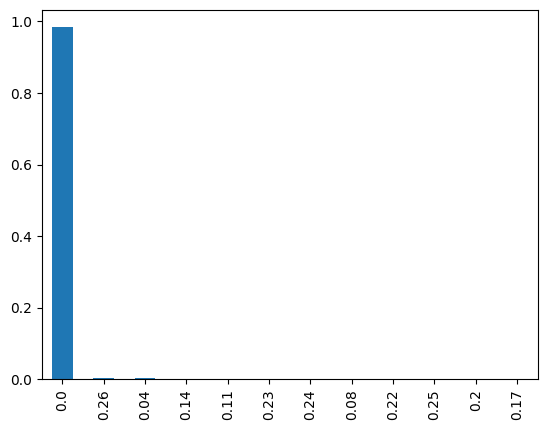

In [54]:
var_client.MORTGAGE_IND.value_counts(normalize=True).plot.bar()

In [55]:
churned_clients = var_client[var_client['CHURNED_IND'] != 0].index.tolist()
com_churned_clients = var_client[var_client['COMMERCIALLY_CHURNED'] != 0].index.tolist()
both_churned_label = var_client[(var_client['CHURNED_IND'] != 0) & (var_client['COMMERCIALLY_CHURNED'] != 0)].index.tolist()
either_churned_label = var_client[(var_client['CHURNED_IND'] != 0) | (var_client['COMMERCIALLY_CHURNED'] != 0)].index.tolist()
single_churned_label = var_client[(var_client['CHURNED_IND'] != 0) & (var_client['COMMERCIALLY_CHURNED'] == 0)].index.tolist()
single_churned_label_com = var_client[(var_client['CHURNED_IND'] == 0) & (var_client['COMMERCIALLY_CHURNED'] != 0)].index.tolist()
not_churned_clients = var_client[(var_client['CHURNED_IND'] == 0) & (var_client['COMMERCIALLY_CHURNED'] == 0)].index.tolist()

# Feature Selection

From previous section we know to drop: 'Record_Count', 'TARGET'

### Univariate Correlation

In [ ]:
from src.feature_selection import plot_corr_cat
from sklearn.preprocessing import LabelEncoder
df_corr = df_imp.copy(deep=True) 
encoding_cols = ['CLIENTGROUP', 'ACCOUNTMODEL', 'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY']
for col in encoding_cols:
    encoder = LabelEncoder()
    df_corr[col] = encoder.fit_transform(df_corr[col])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
col_drop = ['MONTH_PERIOD', 'Record_Count', 'TARGET', 'CHURNED_IND', 'COMMERCIALLY_CHURNED', 'CUSTOMER_ID', 'CROSS_SELL_SCORE']
X, y1, y2 = df_corr.drop(col_drop, axis=1), df['CHURNED_IND'], df['COMMERCIALLY_CHURNED']
k_best = SelectKBest(chi2, k=10).fit(X, y1)
selected_cols = k_best.get_feature_names_out()
selected_cols

In [ ]:
# import matplotlib.pyplot as plt
# from seaborn import  heatmap
# corr_mat = df_corr.corr()
# plt.figure(figsize=(12, 8))
# heatmap(corr_mat, cmap='RdYlGn', annot=True)

# Feature Engineering

In [ ]:
df.MONTH_PERIOD = df.MONTH_PERIOD.apply(lambda x: (x.to_period('M') - pd.to_datetime('2011-1-1').to_period('M')).n)

# Modelling

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
random_state = 42

X, y = X[selected_cols], y1
regs = [ LogisticRegression(), RandomForestClassifier()]


results = {}
for reg in regs:

    pipeline = Pipeline([
        ('Model', reg),
    ], verbose=False)

    kfs = KFold(n_splits=5, shuffle=True, random_state=random_state)
    # For the list of all metrics visit: https://scikit-learn.org/stable/modules/model_evaluation.html
    metrics = ['recall', 'roc_auc', 'accuracy', 'f1'] 
    scores = cross_validate(pipeline, X, y, cv=kfs, scoring=metrics)
    # We will not use cross_val_score as it can only accept one metric
    print(scores)
    reg_name = type(reg).__name__
    results[reg_name] = {key: round(np.mean(val), 3) for key, val in scores.items()}
pd.DataFrame(results)

## Time-to-Event Approach

We need to ensure that time column "MONTH_PERIOD" is engineered to number of months after the start of observation/data collection
df.MONTH_PERIOD = df.MONTH_PERIOD.apply(lambda x: (x.to_period('M') - pd.to_datetime('2011-1-1').to_period('M')).n)

In [68]:
import lifelines
from lifelines.utils import to_long_format
# df.MONTH_PERIOD = df.MONTH_PERIOD.apply(lambda x: (x.to_period('M') - pd.to_datetime('2011-1-1').to_period('M')).n)

In [21]:
df_surv = df.copy(deep=True)
df_surv = df_surv.drop(['TARGET', 'Record_Count'], axis=1)

dfs = {}
for id in df_surv.CUSTOMER_ID.unique():
    df_id = df_surv[df_surv.CUSTOMER_ID.eq(id)].sort_values(by='MONTH_PERIOD', ascending=False)
    df_id = df_id.assign(
        start=df['MONTH_PERIOD'],
        stop=df['MONTH_PERIOD'] + 1,
        event=df['CHURNED_IND'].astype(bool),
        id=df['CUSTOMER_ID'],
    )
    slice_size = df_id.CHURNED_IND.lt(1).sum()
    # samples =  slice_size + 1 if slice_size < 24 
    dfs[id] = df_id.tail(slice_size + 1)

In [22]:
def one_hot_encoder(df:pd.DataFrame, *col, **kwargs):
    """
    Convert categorical variable into dummy variables and keeps the given categorical columns. 
    Under the hood uses pandas get_dummies method

    Parameters:
    -----------
    col: The specific column to be one hot encoded
    
    cats: the categories/columns that will be kept after one hot encoding.

    Example:
    --------
    >> s = pd.Series(list('abca'))
    >> pd.get_dummies(s)
       a  b  c
    0  1  0  0
    1  0  1  0
    2  0  0  1
    3  1  0  0
    """
    df_org = df.copy(deep=True)
    cols = list(col)
    return pd.get_dummies(df_org, columns=cols, **kwargs) 


In [ ]:
df_surv_final = (
    pd.concat([df.reset_index(drop=True) for id, df in dfs.items()])
    .drop(['CUSTOMER_ID', 'MONTH_PERIOD', 'CHURNED_IND', 'COMMERCIALLY_CHURNED'], axis=1)
)

In [ ]:
# df_surv_final.columns
df.CLIENTGROUP#.apply(str.rstrip)

In [43]:
df_surv_final = (
    pd.concat([df.reset_index(drop=True) for id, df in dfs.items()])
    .drop(['CUSTOMER_ID', 'MONTH_PERIOD', 'CHURNED_IND', 'COMMERCIALLY_CHURNED',
          'ACCOUNTMODEL', 'PAYMENT_ACTIVITIES_CODE', 'MORTGAGE_IND', 'DEBIT_CLASS', 'AGE_CLASS', 'BUSINESS_VOLUME_CLASS', 'CLIENTGROUP'], axis=1) # CROSS_SELL_SCORE is kept
    .pipe(one_hot_encoder, 'CREDIT_CLASS', 'INVESTED_CAPITAL_CLASS', 
        'SAVINGS_CAPITAL_CLASS', 'MIN_FEED_CLASS', 'REVENUES_CLASS')
    .pipe(one_hot_encoder, 'HOMEBANK_COLOUR', 'LOYALITY',  dummy_na=True) #'AGE_CLASS',
    # .drop([
    #     'CLIENTGROUP_0106', 'CLIENTGROUP_0109', 'CLIENTGROUP_0205', 'CLIENTGROUP_0253', 'CLIENTGROUP_0101',
    #     'CLIENTGROUP_0421', 'CLIENTGROUP_1114', 'CLIENTGROUP_1170', #'AGE_CLASS_Leeftijd_12_17', 'AGE_CLASS_Leeftijd_24_29', 'AGE_CLASS_Leeftijd_18_23',
    #      ], axis=1)
    .reset_index(drop=True)
)

In [344]:
from lifelines import CoxTimeVaryingFitter
# df_cox = df_surv_final
# ctv = CoxTimeVaryingFitter(penalizer=0.1)
# ctv.fit(df_cox, id_col="id", event_col="event", start_col="start", stop_col="stop", show_progress=True)
# ctv.print_summary()

In [ ]:
# df_cox[df_cox.id.eq(churned_clients[2])]

# Stacking

In [84]:
# df.MONTH_PERIOD = df.MONTH_PERIOD.apply(lambda x: (x.to_period('M') - pd.to_datetime('2011-1-1').to_period('M')).n)

In [716]:
from collections import defaultdict
churn_col = 'CHURNED_IND'
horizon = 6 # Time horizon (Even number) to find dominant recent past states per column
df_s = df.drop(['TARGET', 'Record_Count'], axis=1)
bool_cols = [
    'PAYMENT_IND', 'SAVING_IND', 'INVESTMENTS_IND', 'LENDING_IND', 'INSURANCE_LIFE_IND',
    'INSURANCE_NONLIFE_IND', 'MORTGAGE_IND', 'PACKAGE_IND']
cat_cols = [
    'CREDIT_CLASS', 'DEBIT_CLASS', 'INVESTED_CAPITAL_CLASS', 'SAVINGS_CAPITAL_CLASS', 
    'MIN_FEED_CLASS', 'REVENUES_CLASS', 'PAYMENT_ACTIVITIES_CODE', 'CROSS_SELL_SCORE', 'CLIENTGROUP', 'ACCOUNTMODEL',
    'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY', 'AGE_CLASS']

_dics = defaultdict(lambda: defaultdict(dict))
ids_skipped = []
try:
    for id in df_s.CUSTOMER_ID.unique():
        df_id = (
            df_s[df_s.CUSTOMER_ID.eq(id)]
            .sort_values(by='MONTH_PERIOD', ascending=False)
            .reset_index(drop=True)
        )
        # client switches active -> churn -> active 
        if df_id[churn_col].diff().abs().sum() > 1:
            print(f'Client {id}, active -> churn -> active ')
            ids_skipped.append(id)
            continue
        # client starts with churn status 
        if df_id[churn_col].values[-1]:
            print(f'Client {id} churn -> active')
            ids_skipped.append(id)
            continue

        if 1 in df_id[churn_col].values:
            _dics[id]['event'] = 1
            ind_lt_1 = df_id[churn_col].lt(1)
            ind_churn = df_id[df_id[churn_col].lt(1)].index.min()
            _dics[id]['churn_time'] = df_id.loc[ind_churn - 1, 'MONTH_PERIOD']
            for col in set(df_id.columns) - { 'MONTH_PERIOD', 'CHURNED_IND', 'COMMERCIALLY_CHURNED', 'CUSTOMER_ID'}:
                vals = df_id[ind_lt_1][col].values
                _dics[id][col] = vals[0] # Most recent value
                _dics[id][col + '_CHANGED'] = 1 if len(set(vals[1:horizon])) > 1 else 0
                # _dics[id][col + '_PAST_STATE'] = lst[0] if len(lst[1:]) == 0 else max(vals[1:horizon], key=lst.count) # Most frequent value past horizon 
        else:
            _dics[id]['event'] = 0
            _dics[id]['churn_time'] = pd.to_datetime('2013-1-1')
            for col in set(df_id.columns) - { 'MONTH_PERIOD', 'CHURNED_IND', 'COMMERCIALLY_CHURNED', 'CUSTOMER_ID'}:
                vals = df_id[col].values
                _dics[id][col] = vals[0] # Most recent value
                _dics[id][col + '_CHANGED'] = 1 if len(set(vals[1:horizon])) > 1 else 0
                # _dics[id][col + '_PAST_STATE'] = lst[0] if len(lst[1:]) == 0 else max(vals[1:horizon], key=lst.count) # Most frequent value past horizon 
        
except:
    print(id)

df_red = pd.DataFrame(_dics).T.rename_axis('id').reset_index()

Client 8575185722, active -> churn -> active 
Client 5665592821 churn -> active
Client 5488118241 churn -> active
Client 1071838917 churn -> active
Client 7365769653 churn -> active
Client 2531575096 churn -> active
Client 9171438807, active -> churn -> active 
Client 4414250247 churn -> active
Client 4180409067, active -> churn -> active 
Client 8795639591, active -> churn -> active 
Client 217538038 churn -> active
Client 3895707877, active -> churn -> active 
Client 849998868 churn -> active
Client 8304216136, active -> churn -> active 
Client 3168365614 churn -> active
Client 3267472564 churn -> active
Client 5465114923, active -> churn -> active 
Client 7402540707 churn -> active
Client 8146565483 churn -> active
Client 624521017, active -> churn -> active 
Client 7757102231 churn -> active
Client 3069079974 churn -> active
Client 5274654888 churn -> active
Client 12284116 churn -> active
Client 9878608521, active -> churn -> active 
Client 4741477070, active -> churn -> active 
C

### New dataset
45 churn samples experienced either rechurn or rejoin. For the sake of avoiding bias these samples are removed frome the dataset.

In [717]:
df_red = (
    df_red
    .pipe(datetime2int, 'churn_time')
    .reset_index(drop=True)
    .fillna('unknown')
)
len(ids_skipped)

Step: datetime2int | Shape: (4124, 47) | Computation Time: 0.569928s
Step: datetime2int | Shape: (4124, 47) | Computation Time: 0.569928s
Step: datetime2int | Shape: (4124, 47) | Computation Time: 0.569928s
Step: datetime2int | Shape: (4124, 47) | Computation Time: 0.569928s
Step: datetime2int | Shape: (4124, 47) | Computation Time: 0.569928s


45

# Seasonality [pattern in churn time]

<AxesSubplot: >

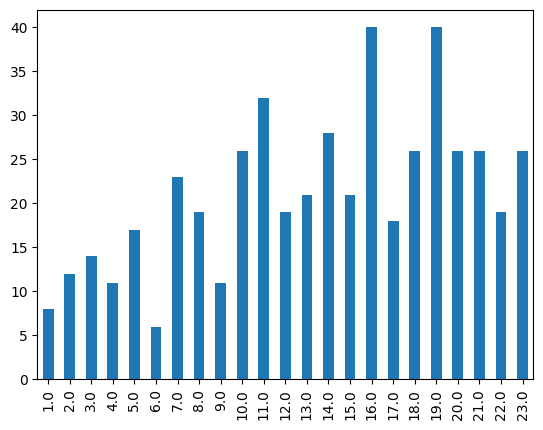

In [695]:
df_red[df_red.event == 1]['churn_time'].value_counts().sort_index().plot.bar()


In [659]:
# df_red.groupby('event')['PACKAGE_IND'].value_counts()
df_red.columns

Index(['id', 'event', 'churn_time', 'PACKAGE_IND', 'PACKAGE_IND_CHANGED',
       'HOMEBANK_COLOUR', 'HOMEBANK_COLOUR_CHANGED', 'CLIENTGROUP',
       'CLIENTGROUP_CHANGED', 'MORTGAGE_IND', 'MORTGAGE_IND_CHANGED',
       'INSURANCE_NONLIFE_IND', 'INSURANCE_NONLIFE_IND_CHANGED', 'LOYALITY',
       'LOYALITY_CHANGED', 'MIN_FEED_CLASS', 'MIN_FEED_CLASS_CHANGED',
       'CREDIT_CLASS', 'CREDIT_CLASS_CHANGED', 'PAYMENT_IND',
       'PAYMENT_IND_CHANGED', 'ACCOUNTMODEL', 'ACCOUNTMODEL_CHANGED',
       'AGE_CLASS', 'AGE_CLASS_CHANGED', 'CROSS_SELL_SCORE',
       'CROSS_SELL_SCORE_CHANGED', 'REVENUES_CLASS', 'REVENUES_CLASS_CHANGED',
       'DEBIT_CLASS', 'DEBIT_CLASS_CHANGED', 'SAVINGS_CAPITAL_CLASS',
       'SAVINGS_CAPITAL_CLASS_CHANGED', 'INVESTMENTS_IND',
       'INVESTMENTS_IND_CHANGED', 'INSURANCE_LIFE_IND',
       'INSURANCE_LIFE_IND_CHANGED', 'BUSINESS_VOLUME_CLASS',
       'BUSINESS_VOLUME_CLASS_CHANGED', 'PAYMENT_ACTIVITIES_CODE',
       'PAYMENT_ACTIVITIES_CODE_CHANGED', 'LENDING_IND

In [675]:
df_red['churn_time'] = df_red['churn_time'].astype('float16')
df_red['event'] = df_red['event'].astype('float16')

In [719]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter, WeibullFitter
from lifelines.plotting import add_at_risk_counts
import matplotlib.pyplot as plt
%matplotlib inline

def plot_churn_risk(df, col, estimator, ax=None, T:str='churn_time', E:str='event',  horizon=23, at_risk=False):
    """ Plot univariate churn risk """

    if col not in df.columns:
        raise KeyError(f'{col} not in data frame')
    if not ax:
        fig, ax = plt.subplots(figsize=(6, 5))
    timeline = np.linspace(0, horizon, 1000)
    vals = set(df[col].values)
    estimators = [estimator(label=col.split('_')[0]+'_'+str(val)) for val in vals]
    inds = [df_red[col] == val if str(val) != 'nan' else df_red[col].isna() for val in vals ]
    estimators = [estimator.fit(df_red[inds[i]][T], df_red[inds[i]][E], timeline=timeline) 
                    for i, estimator in enumerate(estimators)]
    # for i, estimator in enumerate(estimators[0:1]):
    #     # estimator.fit(df_red[inds[i]][T], df_red[inds[i]][E], timeline=timeline) 
    #     print(df_red[inds[i]][T], df_red[inds[i]][E])
    # if type(estimator) in ['NelsonAalenFitter', 'WeibullFitter']:
    for estimator in estimators:
        estimator.plot(ci_show=False, ax=ax)
    if at_risk:
        add_at_risk_counts(*estimators, ax=ax, fontsize=10, rows_to_show=['At risk'])
    ax.set_ylim(0.5)
    ax.set_xlim([0, 23])
    ax.set_xlabel('Months', fontsize=10)
    ax.set_ylabel('Probability of Retention', fontsize=10)

In [720]:
bool_cols

['PAYMENT_IND',
 'SAVING_IND',
 'INVESTMENTS_IND',
 'LENDING_IND',
 'INSURANCE_LIFE_IND',
 'INSURANCE_NONLIFE_IND',
 'MORTGAGE_IND',
 'PACKAGE_IND']

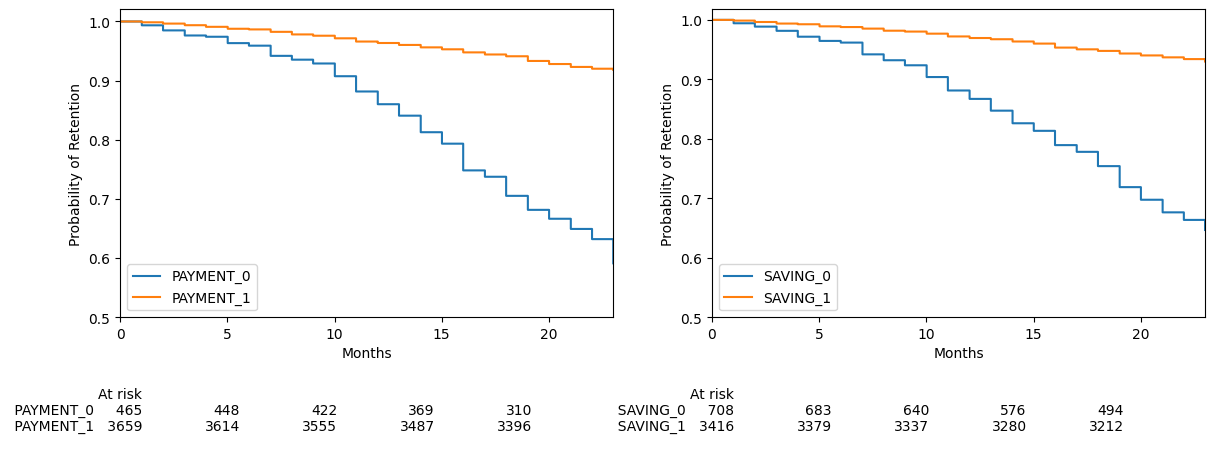

In [721]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# ('INSURANCE_LIFE_IND', 'INSURANCE_LIFE_IND'), ('MORTGAGE_IND', 'PACKAGE_IND'), ('INVESTMENTS_IND', 'LENDING_IND')
for i, j in [('PAYMENT_IND', 'SAVING_IND')]: 
    plot_churn_risk(df_red, i, ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
    plot_churn_risk(df_red, j, ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

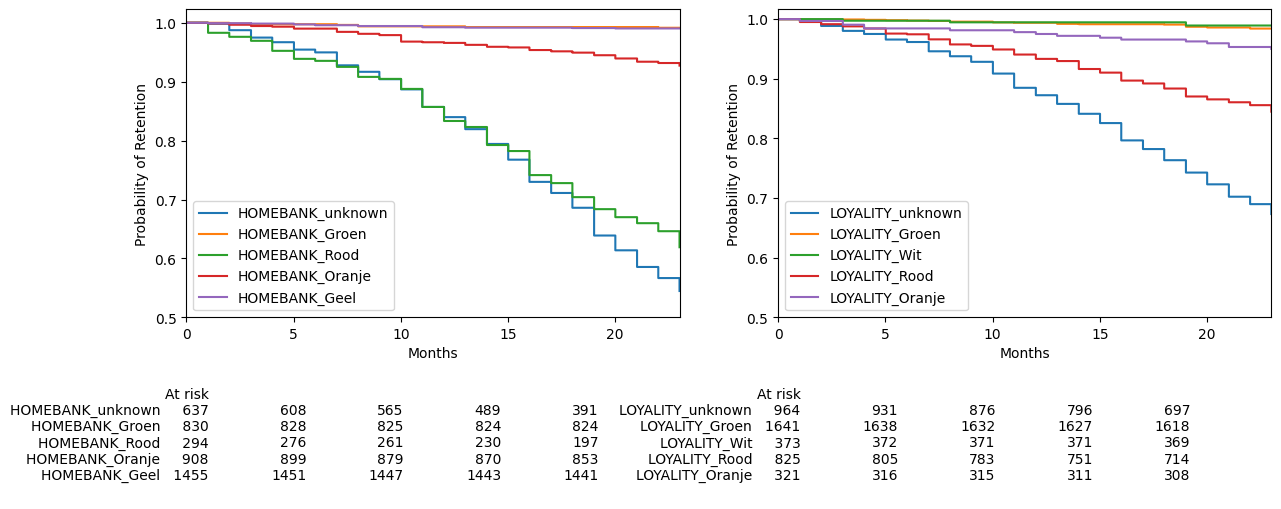

In [722]:
# 'CREDIT_CLASS', 'DEBIT_CLASS', 'INVESTED_CAPITAL_CLASS', 'SAVINGS_CAPITAL_CLASS', 
# 'MIN_FEED_CLASS', 'REVENUES_CLASS', 'PAYMENT_ACTIVITIES_CODE', 'CROSS_SELL_SCORE', 'CLIENTGROUP', 'ACCOUNTMODEL',
# 'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY']
fig, ax = plt.subplots(1,2, figsize=(14, 4))
plot_churn_risk(df_red, 'HOMEBANK_COLOUR', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'LOYALITY', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

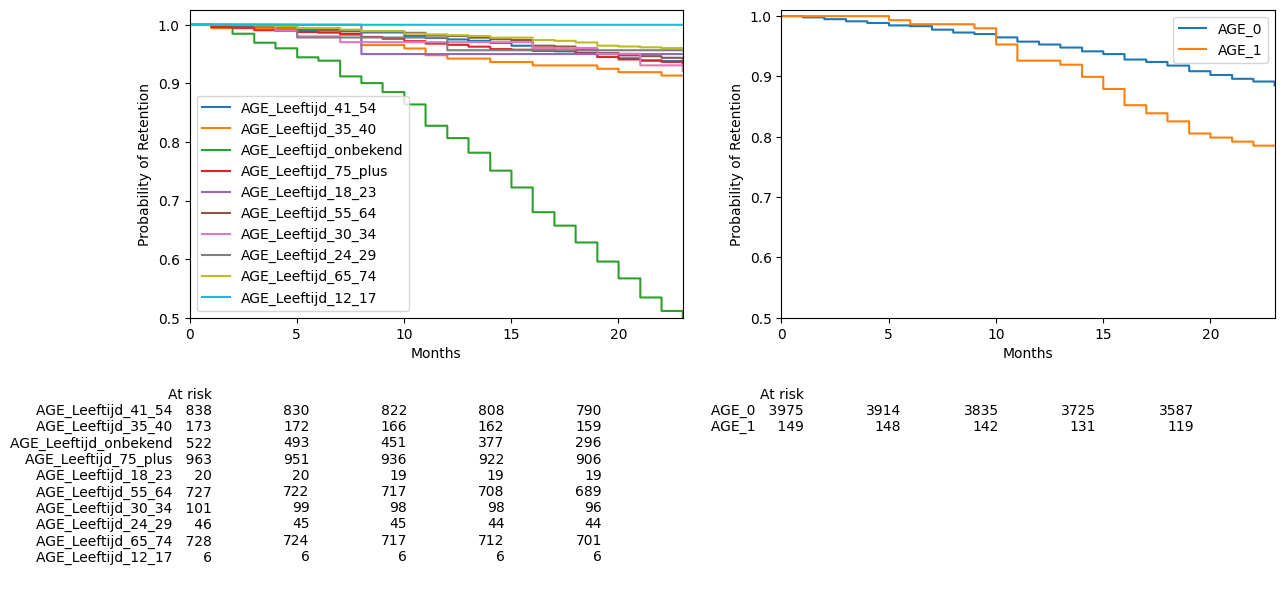

In [723]:
fig, ax = plt.subplots(1,2, figsize=(14, 4))
# 'CREDIT_CLASS', 'DEBIT_CLASS', 'INVESTED_CAPITAL_CLASS', 'SAVINGS_CAPITAL_CLASS', 
# 'MIN_FEED_CLASS', 'REVENUES_CLASS', 'PAYMENT_ACTIVITIES_CODE', 'CROSS_SELL_SCORE', 'CLIENTGROUP', 'ACCOUNTMODEL',
# 'AGE_CLASS', 'HOMEBANK_COLOUR', 'LOYALITY']
plot_churn_risk(df_red, 'AGE_CLASS', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'AGE_CLASS_CHANGED', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

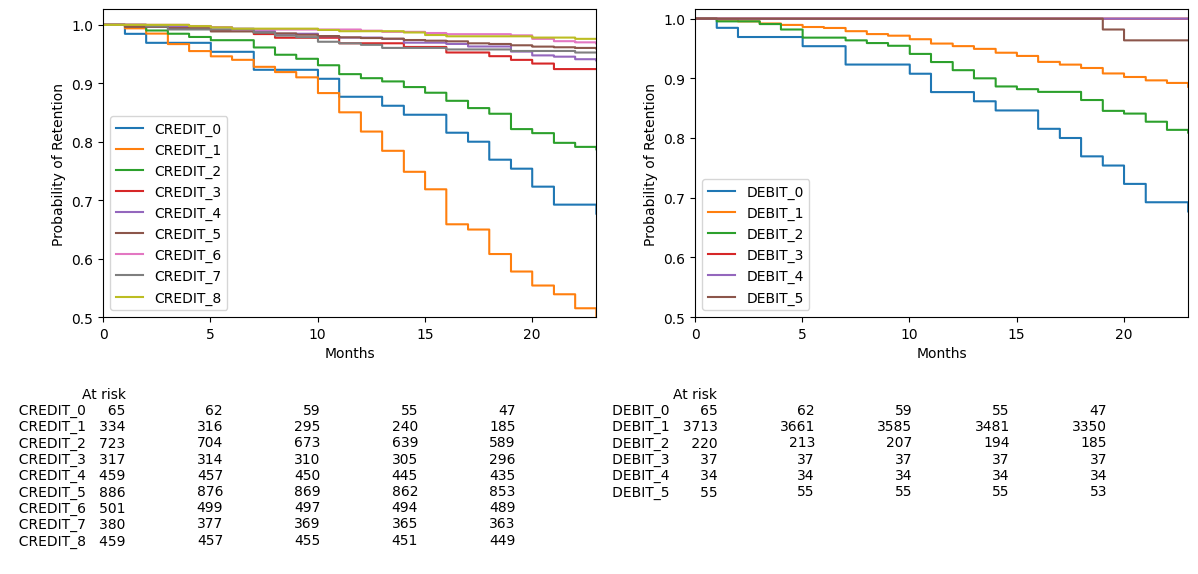

In [724]:
fig, ax = plt.subplots(1,2, figsize=(14, 4))
plot_churn_risk(df_red, 'CREDIT_CLASS', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'DEBIT_CLASS', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

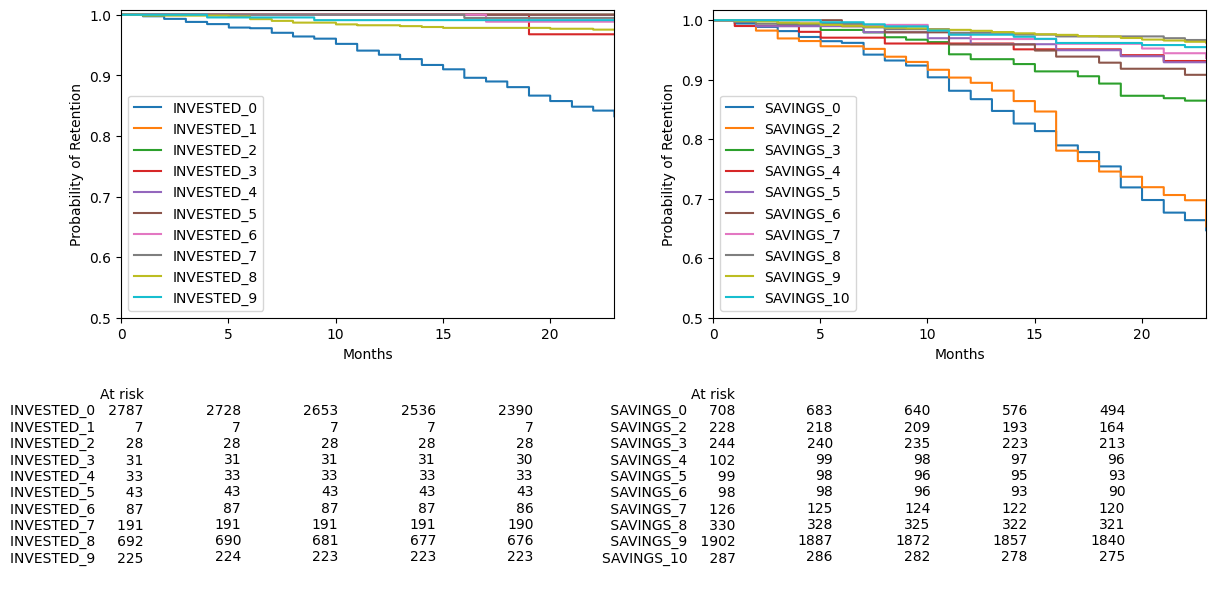

In [725]:
fig, ax = plt.subplots(1,2, figsize=(14, 4)) 
plot_churn_risk(df_red, 'INVESTED_CAPITAL_CLASS', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'SAVINGS_CAPITAL_CLASS', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

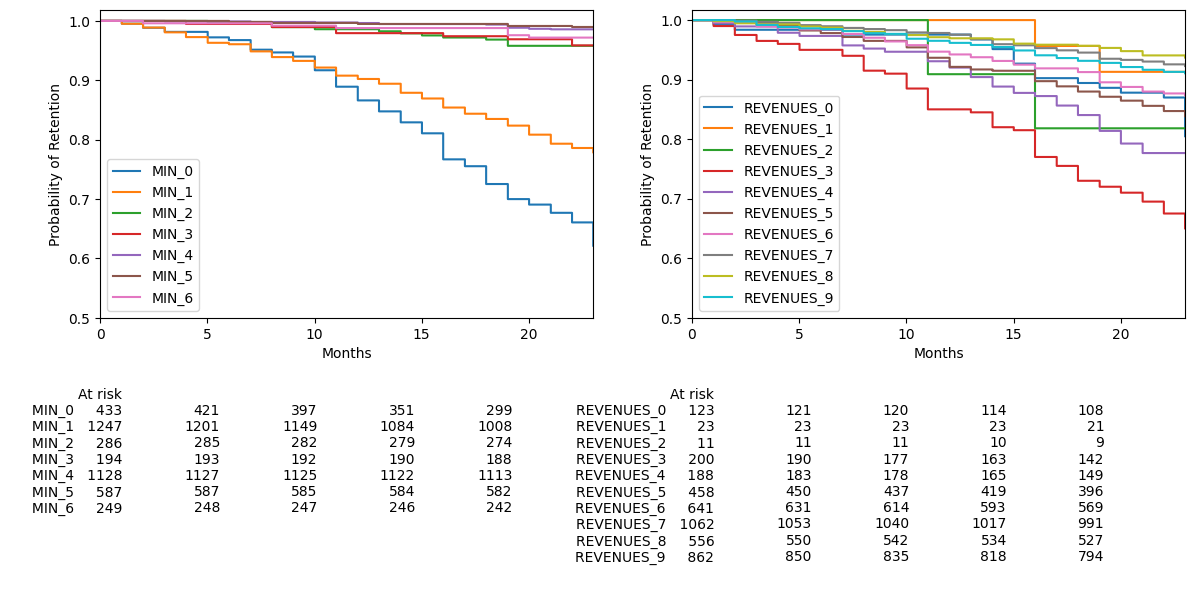

In [726]:
fig, ax = plt.subplots(1,2, figsize=(14, 4)) 
plot_churn_risk(df_red, 'MIN_FEED_CLASS', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'REVENUES_CLASS', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

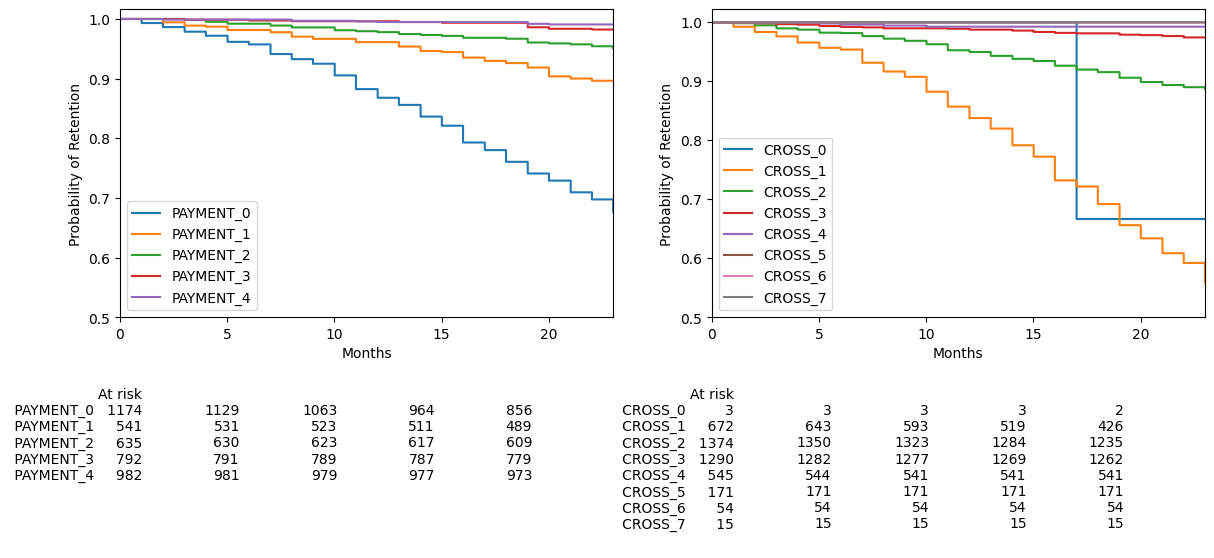

In [727]:
# 'CLIENTGROUP', 'ACCOUNTMODEL',
fig, ax = plt.subplots(1,2, figsize=(14, 4)) 
plot_churn_risk(df_red, 'PAYMENT_ACTIVITIES_CODE', ax=ax[0], estimator=KaplanMeierFitter, at_risk=True)
plot_churn_risk(df_red, 'CROSS_SELL_SCORE', ax=ax[1], estimator=KaplanMeierFitter, at_risk=True)

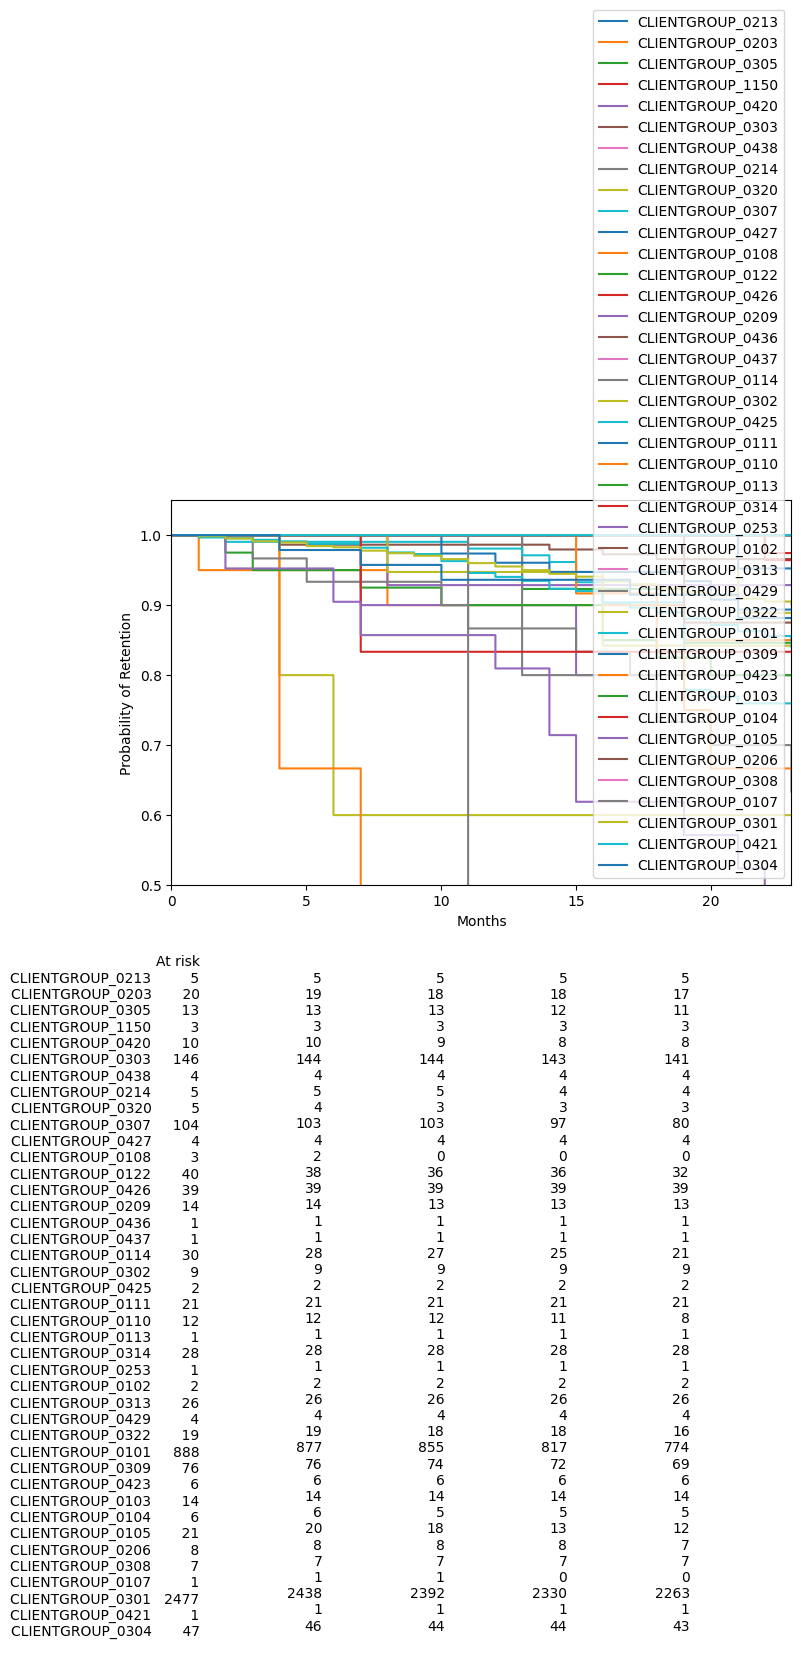

In [700]:
fig, ax = plt.subplots(figsize=(8, 5)) 
plot_churn_risk(df_red, 'CLIENTGROUP', ax=ax, estimator=KaplanMeierFitter, at_risk=True)

In [ ]:
# 0101: 13%, 0307:23 %,  0105: 42%


In [853]:
df_red.AGE_CLASS.unique()

array(['Leeftijd_65_74', 'Leeftijd_55_64', 'Leeftijd_onbekend',
       'Leeftijd_75_plus', 'Leeftijd_41_54', 'Leeftijd_24_29',
       'Leeftijd_35_40', 'Leeftijd_30_34', 'Leeftijd_18_23',
       'Leeftijd_12_17'], dtype=object)

# Cox Partial Hazard Model

In [870]:
df_cox = (
    df_red
    .pipe(one_hot_encoder, *cat_cols)
    [[
        'event', 'churn_time', 
        'PAYMENT_IND',
        'SAVING_IND',
        'CREDIT_CLASS_0', 
        'CREDIT_CLASS_1',
        # 'DEBIT_CLASS_0',
        # 'SAVINGS_CAPITAL_CLASS_0', 
        'SAVINGS_CAPITAL_CLASS_2',
        # 'MIN_FEED_CLASS_0', 
        # 'REVENUES_CLASS_3',
        'PAYMENT_ACTIVITIES_CODE_0', 
        'CLIENTGROUP_0105',
        'CLIENTGROUP_0307',
        # 'CLIENTGROUP_0101',
        'CROSS_SELL_SCORE_0',
        # 'AGE_CLASS_Leeftijd_onbekend', 
        'HOMEBANK_COLOUR_unknown', 
        'HOMEBANK_COLOUR_Rood',
        'LOYALITY_unknown', 
        'LOYALITY_Rood', 
    ]]
)

In [871]:
# from seaborn import heatmap 
# plt.figure(figsize=(10, 7))
# heatmap(df_cox.corr(), cmap='RdYlGn')

In [872]:
df_cox.columns

Index(['event', 'churn_time', 'PAYMENT_IND', 'SAVING_IND', 'CREDIT_CLASS_0',
       'CREDIT_CLASS_1', 'SAVINGS_CAPITAL_CLASS_2',
       'PAYMENT_ACTIVITIES_CODE_0', 'CLIENTGROUP_0105', 'CLIENTGROUP_0307',
       'CROSS_SELL_SCORE_0', 'HOMEBANK_COLOUR_unknown', 'HOMEBANK_COLOUR_Rood',
       'LOYALITY_unknown', 'LOYALITY_Rood'],
      dtype='object')

In [873]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='churn_time', event_col='event')
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 4124 total observations, 3635 right-censored observations>
             duration col = 'churn_time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 4124
number of events observed = 489
   partial log-likelihood = -3464.43
         time fit was run = 2022-10-19 18:38:54 UTC

---
                            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                         
PAYMENT_IND                -0.28       0.76       0.15            -0.57             0.01                 0.57                 1.01
SAVING_IND                 -0.77       0.46       0.13            -1.02            -0.51                 0.36                 0.60
CREDIT_CLASS_0             -1.18       0.31       0.29            -1.75            -0.60                 0.17                 0.55
CREDIT_CLASS_1             -0.26       0.77       0.17            -0.58             0.07                 0.56                 1.07
SAVINGS_CAPITAL_CLASS_2     0.62       1.87       0.17             0.30             0.95                 1.35                 2.58
PAYMENT_ACTIVITIES_CODE_0   0.86       2.37       0.14             0.60             1.13                 1.82                 3.10
CLIENTGROUP_0105           -0.17       0.85       0.30            -0.75             0.42                 0.47                 1.52
CLIENTGROUP_0307            0.55       1.73       0.22             0.12             0.98                 1.12                 2.67
CROSS_SELL_SCORE_0         -0.19       0.83       1.03            -2.21             1.83                 0.11                 6.24
HOMEBANK_COLOUR_unknown     1.78       5.91       0.16             1.47             2.09                 4.33                 8.07
HOMEBANK_COLOUR_Rood        1.92       6.79       0.18             1.57             2.26                 4.80                 9.62
LOYALITY_unknown            1.09       2.96       0.20             0.69             1.49                 1.99                 4.42
LOYALITY_Rood               0.58       1.78       0.21             0.17             0.98                 1.19                 2.66

                            cmp to     z      p   -log2(p)
covariate                                                 
PAYMENT_IND                   0.00 -1.87   0.06       4.01
SAVING_IND                    0.00 -5.92 <0.005      28.21
CREDIT_CLASS_0                0.00 -3.99 <0.005      13.90
CREDIT_CLASS_1                0.00 -1.55   0.12       3.03
SAVINGS_CAPITAL_CLASS_2       0.00  3.78 <0.005      12.64
PAYMENT_ACTIVITIES_CODE_0     0.00  6.35 <0.005      32.12
CLIENTGROUP_0105              0.00 -0.55   0.58       0.79
CLIENTGROUP_0307              0.00  2.49   0.01       6.30
CROSS_SELL_SCORE_0            0.00 -0.18   0.85       0.23
HOMEBANK_COLOUR_unknown       0.00 11.19 <0.005      94.19
HOMEBANK_COLOUR_Rood          0.00 10.80 <0.005      87.84
LOYALITY_unknown              0.00  5.35 <0.005      23.41
LOYALITY_Rood                 0.00  2.81   0.01       7.64
---
Concordance = 0.88
Partial AIC = 6954.86
log-likelihood ratio test = 1152.29 on 13 df
-log2(p) of ll-ratio test = 788.92